# Avocado Dataset
Een dataset over de avocadoprijzen sinds 2015  
Ik koos voor deze dataset omdat:  
1. Avocado's in populariteit zijn gestegen  
2. De dataset een goede hoeveelheid data had om mee te kunnen werken  

Ik maak gebruik van pandas omdat hier een hoop extra handige tools in zitten  
Vanwege de grote hoeveelheid aan data zijn de lijngrafieken ingekort tot data van de laatste 30 tot 100 lijnen

In [59]:
datafile = 'avocado.csv'
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import pandas as ps


dataAvocado = ps.read_csv(datafile, delimiter=',', parse_dates=['Date'])

In [60]:
dataAvocado.dtypes

ID                       int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [61]:
dataAvocado = dataAvocado.drop(['4046', '4225', '4770', 'type', 'year', 'region', 'ID'], axis=1)

In [62]:
dataAvocado[:25]

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.00
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.00
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.00
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.00
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.00
5,2015-11-22,1.26,55979.78,6683.91,6556.47,127.44,0.00
6,2015-11-15,0.99,83453.76,8318.86,8196.81,122.05,0.00
7,2015-11-08,0.98,109428.33,6829.22,6266.85,562.37,0.00
8,2015-11-01,1.02,99811.42,11388.36,11104.53,283.83,0.00
9,2015-10-25,1.07,74338.76,8625.92,8061.47,564.45,0.00


# Statistiek
## Centrummaten

### Gemiddelden berekenen

In [63]:
print('De gemiddelden van alle kollommen zijn:')
print(dataAvocado.drop(columns="Date").mean())

De gemiddelden van alle kollommen zijn:
AveragePrice         1.405978
Total Volume    850644.013009
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
dtype: float64


### Medianen berekenen

In [65]:
print('De medianen van alle kollommen zijn:')
print(dataAvocado.drop(columns="Date").median())

De medianen van alle kollommen zijn:
AveragePrice         1.37
Total Volume    107376.76
Total Bags       39743.83
Small Bags       26362.82
Large Bags        2647.71
XLarge Bags          0.00
dtype: float64


### Modus berekenen

In [69]:
print('De modussen van alle kollommen zijn:')
print(dataAvocado.mode(numeric_only=True))

De modussen van alle kollommen zijn:
    AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0           1.15       2038.99         0.0         0.0         0.0   
1            NaN       2858.31         NaN         NaN         NaN   
2            NaN       3288.85         NaN         NaN         NaN   
3            NaN       3529.44         NaN         NaN         NaN   
4            NaN       3713.49         NaN         NaN         NaN   
5            NaN       4103.97         NaN         NaN         NaN   
6            NaN       7223.46         NaN         NaN         NaN   
7            NaN       9465.99         NaN         NaN         NaN   
8            NaN      13234.04         NaN         NaN         NaN   
9            NaN      19634.24         NaN         NaN         NaN   
10           NaN      46602.16         NaN         NaN         NaN   
11           NaN     569349.05         NaN         NaN         NaN   

    XLarge Bags  
0           0.0  
1           NaN 

## Spreidingsmaten

### Bereik berekenen

In [72]:
print('Het bereik van de kolommen:')
print('');
print('Maximum')
print('------------------------------')
print(dataAvocado.drop(columns="Date").max())
print('');
print('Minimum')
print('------------------------------')
print(dataAvocado.drop(columns="Date").min())

Het bereik van de kolommen:

Maximum
------------------------------
AveragePrice           3.25
Total Volume    62505646.52
Total Bags      19373134.37
Small Bags      13384586.80
Large Bags       5719096.61
XLarge Bags       551693.65
dtype: float64

Minimum
------------------------------
AveragePrice     0.44
Total Volume    84.56
Total Bags       0.00
Small Bags       0.00
Large Bags       0.00
XLarge Bags      0.00
dtype: float64


### Interkwartiel afstanden berekenen (d.m.v. Boxplot)
#### Boxplot voor gemiddelde prijzen

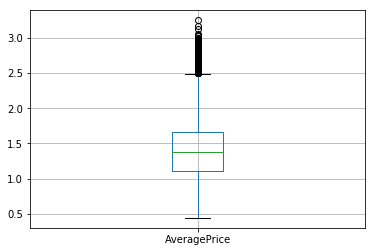

In [75]:
dataAvocado.boxplot(column='AveragePrice')

### Standaarddeviatie voor alle kolommen


In [76]:
print('De standaarddeviatie van alle kollommen zijn:')
print(dataAvocado.drop(columns="Date").std())

De standaarddeviatie van alle kollommen zijn:
AveragePrice    4.026766e-01
Total Volume    3.453545e+06
Total Bags      9.862424e+05
Small Bags      7.461785e+05
Large Bags      2.439660e+05
XLarge Bags     1.769289e+04
dtype: float64


### Correlatie tussen de kolommen

In [77]:
print('De correlatie tussen de kolommen: ')
print(dataAvocado.drop(columns="Date").corr())

De correlatie tussen de kolommen: 
              AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
AveragePrice      1.000000     -0.192752   -0.177088   -0.174730   -0.172940   
Total Volume     -0.192752      1.000000    0.963047    0.967238    0.880640   
Total Bags       -0.177088      0.963047    1.000000    0.994335    0.943009   
Small Bags       -0.174730      0.967238    0.994335    1.000000    0.902589   
Large Bags       -0.172940      0.880640    0.943009    0.902589    1.000000   
XLarge Bags      -0.117592      0.747157    0.804233    0.806845    0.710858   

              XLarge Bags  
AveragePrice    -0.117592  
Total Volume     0.747157  
Total Bags       0.804233  
Small Bags       0.806845  
Large Bags       0.710858  
XLarge Bags      1.000000  


#### Lijngrafiek voor gemiddelde prijzen (Laatste 100 anders is dataset onduidelijk)

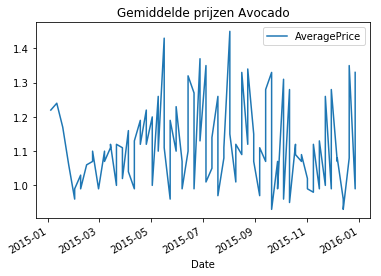

In [79]:
dataAvocado[:100].sort_values(by="Date", ascending=False).plot(x="Date", y="AveragePrice",title="Gemiddelde prijzen Avocado")

#### Lijngrafiek voor totale volumes (Laatste 35)

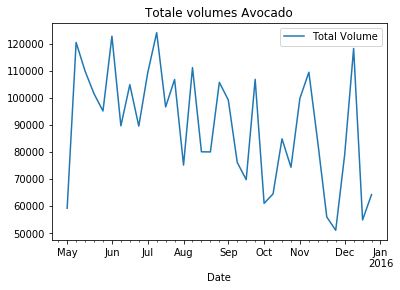

In [81]:
dataAvocado[:35].sort_values(by="Date", ascending=False).plot(x="Date", y="Total Volume", title="Totale volumes Avocado")